<a href="https://colab.research.google.com/github/mrcomputer2018/Aps2_metodosNumericos/blob/main/Aps2_metodosNumericos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

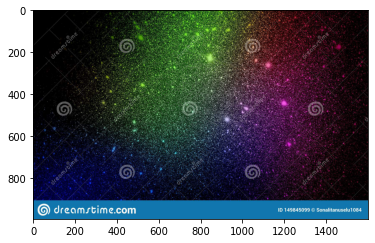

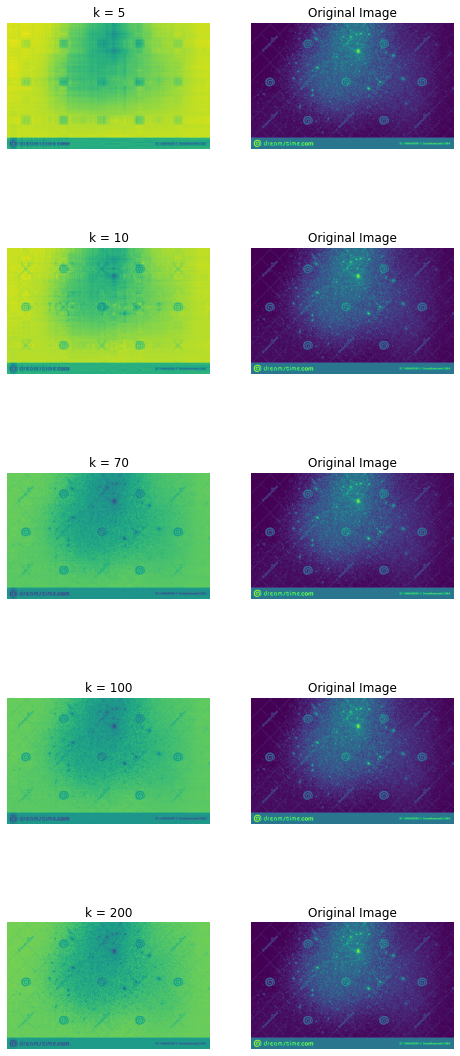

In [ ]:
### Testando o codigo de Imagens

import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
from numpy.linalg import svd
## adicionado p/imagem diferente
from skimage import io

origem = "https://thumbs.dreamstime.com/z/o-rgb-verde-e-azul-vermelho-protegido-brilha-fundo-textured-wallpaper-p-gina-do-livro-pinturas-impress-fundos-m-veis-tampas-poupan-149845099.jpg"
image = io.imread(origem)
plt.imshow(image)
# convert to grayscale
gray_image = rgb2gray(image)

# calculate the SVD and plot the image
U,S,V_T = svd(gray_image, full_matrices=False)
S = np.diag(S)
fig, ax = plt.subplots(5, 2, figsize=(8, 20))

curr_fig=0
for r in [5, 10, 70, 100, 200]:
  image_approx=U[:, :r] @ S[0:r, :r] @ V_T[:r, :]
  ax[curr_fig][0].imshow(256-image_approx)
  ax[curr_fig][0].set_title("k = "+str(r))
  ax[curr_fig,0].axis('off')
  ax[curr_fig][1].set_title("Original Image")
  ax[curr_fig][1].imshow(gray_image)
  ax[curr_fig,1].axis('off')
  curr_fig +=1
plt.show()


In [ ]:
### Compressao de imagem
import numpy as np
import matplotlib.pyplot as plt
import cv2
from numpy.linalg import svd
from PIL import Image

def compress_image(img_name, img, k):
    print("processing...")

    # splitting the array into three 2D array (svd only apply on 2D array)
    r = img[:, :, 0]  # array for R
    g = img[:, :, 1]  # array for G
    b = img[:, :, 2]  # array for B

    print("compressing...")

    # Calculating the svd components for all three arrays
    ur, sr, vr = svd(r, full_matrices=False)
    ug, sg, vg = svd(g, full_matrices=False)
    ub, sb, vb = svd(b, full_matrices=False)

    print('dimensões do canal r: {}'.format(r.shape))

    # Forming the compress image with reduced information
    # We are selecting only k singular values for each array to make image which will exclude some information from the
    # image while image will be of same dimension

    # ur (mxk), diag(sr) (kxk) and vr (kxn) if image is off (mxn)
    # so let suppose we only selecting the k1 singular value from diag(sr) to form image

    rr = np.dot(ur[:, :k], np.dot(np.diag(sr[:k]), vr[:k, :]))
    rg = np.dot(ug[:, :k], np.dot(np.diag(sg[:k]), vg[:k, :]))
    rb = np.dot(ub[:, :k], np.dot(np.diag(sb[:k]), vb[:k, :]))

    print("arranging...")

    # Creating a array of zeroes; shape will be same as of image matrix
    rimg = np.zeros(img.shape)

    # Adding matrix for R, G & B in created array
    rimg[:, :, 0] = rr
    rimg[:, :, 1] = rg
    rimg[:, :, 2] = rb

    # It will check if any value will be less than 0 will be converted to its absolute
    # and, if any value is greater than 255 than it will be converted to 255
    # because in image array of unit8 can only have value between 0 & 255
    for ind1, row in enumerate(rimg):
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    rimg[ind1, ind2, ind3] = abs(value)
                if value > 255:
                    rimg[ind1, ind2, ind3] = 255

    # converting the compress image array to uint8 type for further conversion into image object
    compressed_image = rimg.astype(np.uint8)

    # Showing the compressed image in graph
    plt.title("Image Name - figura compactada: " + img_name + "\n")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()
    cv2.imwrite("Imagem/comp-" + str(img_name) + ".jpg", compressed_image)

    # Uncomment below code if you want to save your compressed image to the file
    # compressed_image = Image.fromarray(compressed_image)
    # compressed_image.save("image_name.jpg")



Imagem RGB



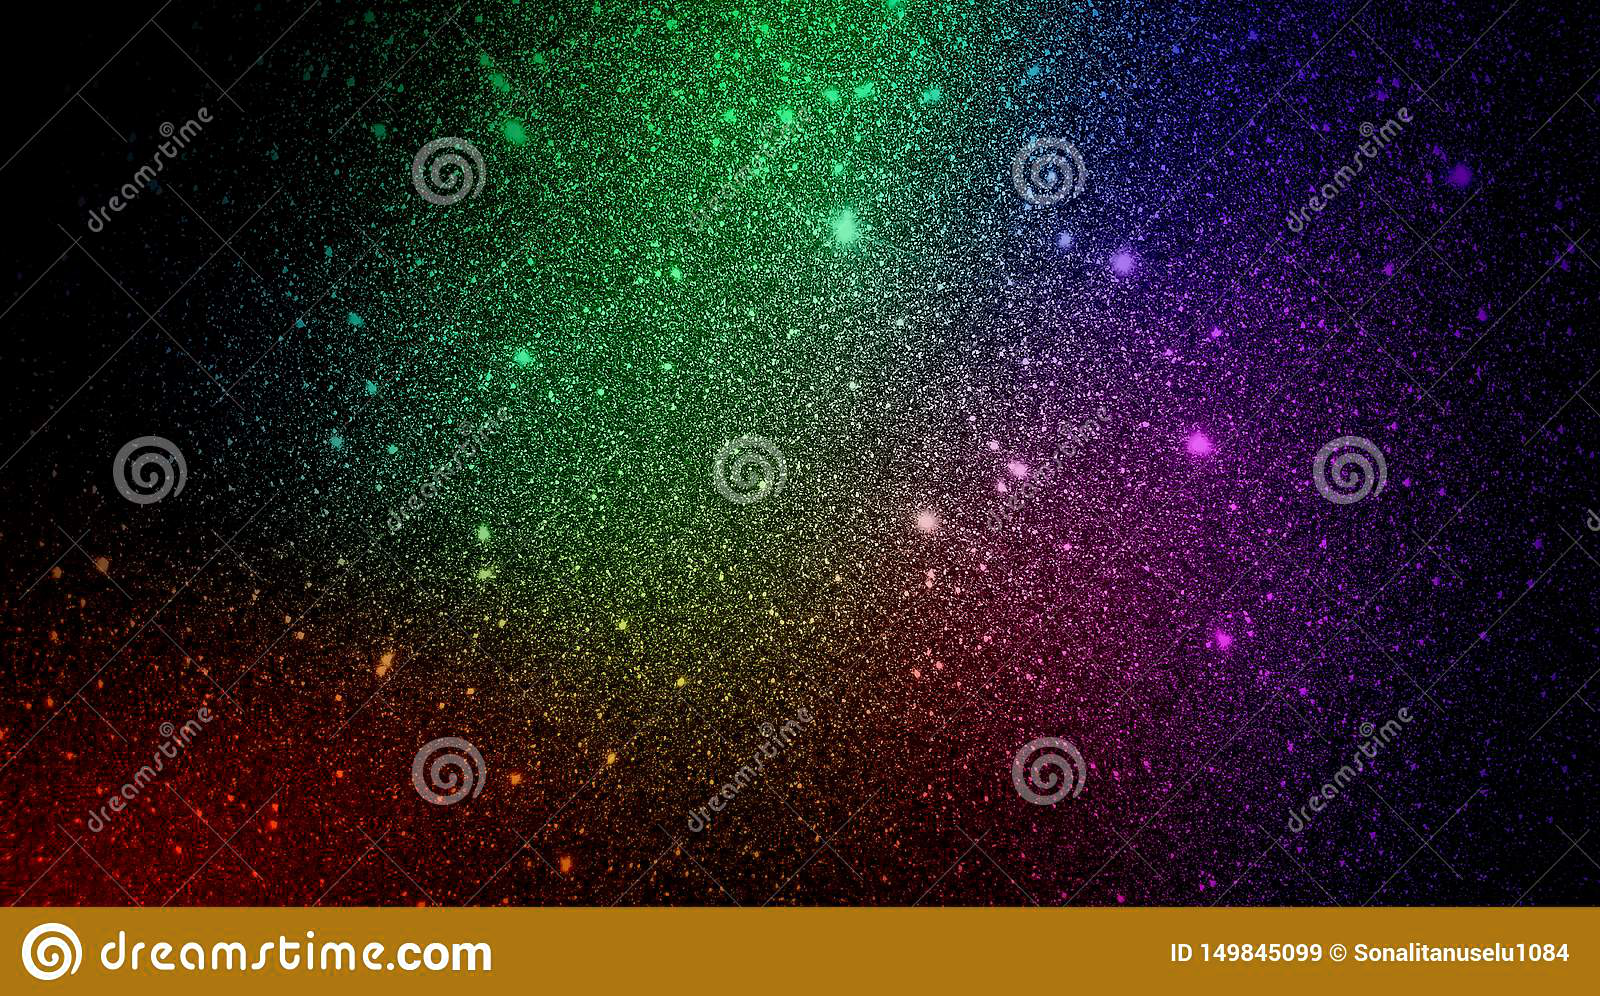



Imagem em Tons de Cinza



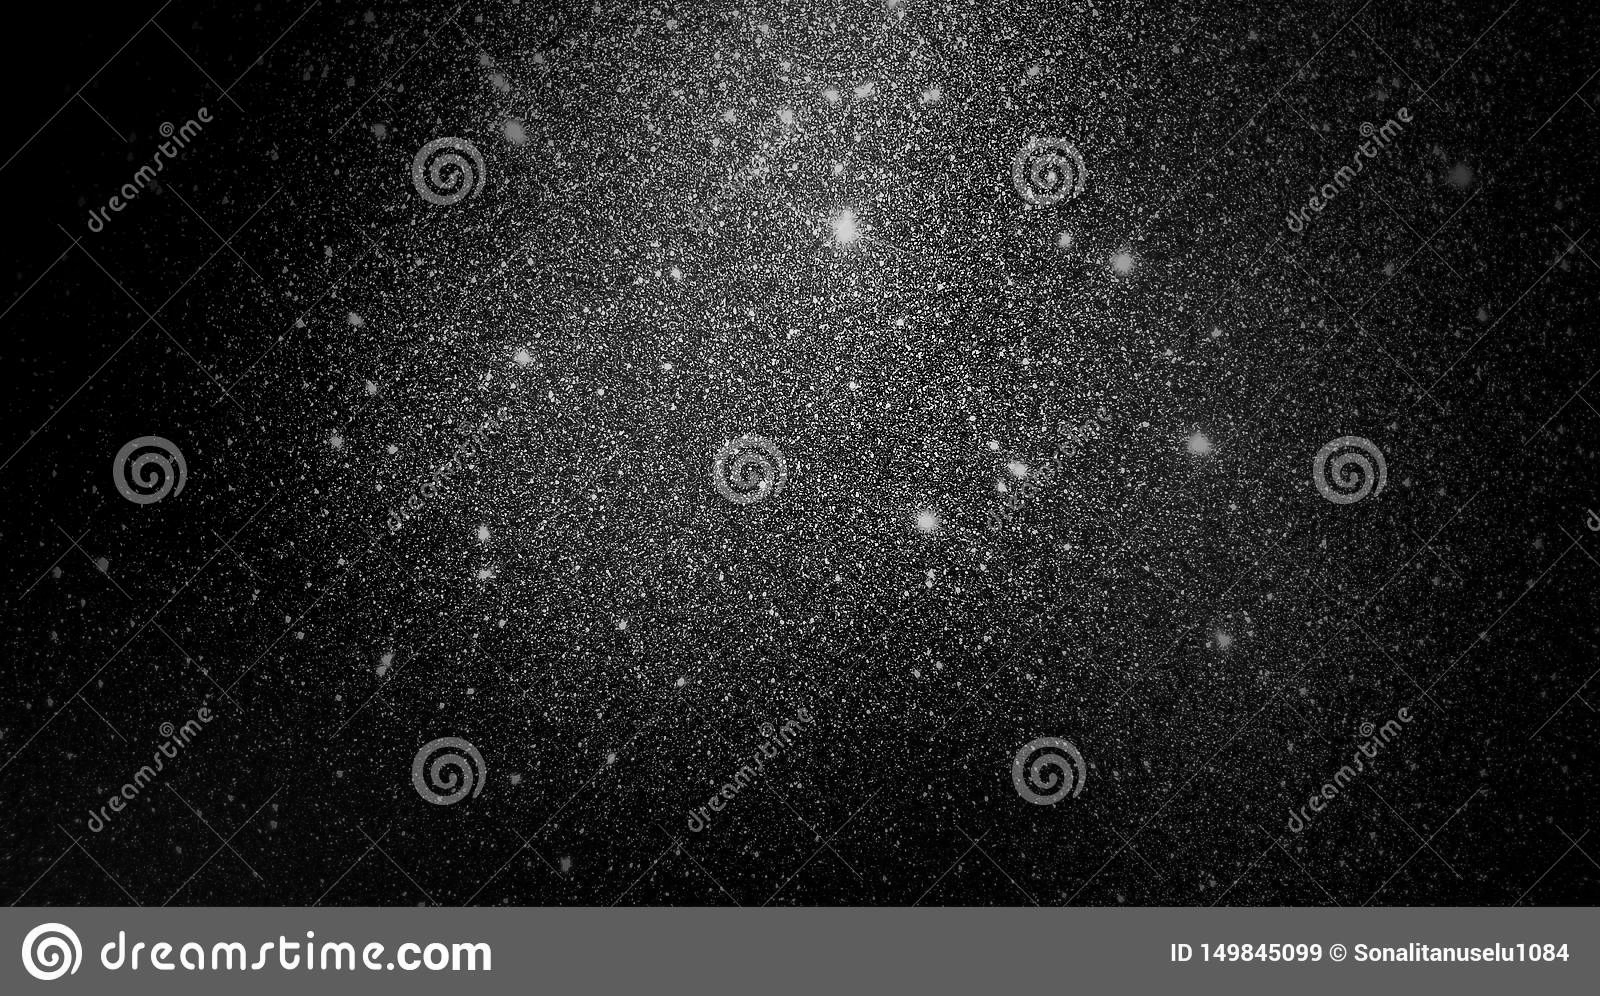



Imagem Comprimida

processing...
compressing...
dimensões do canal r: (996, 1600)
arranging...


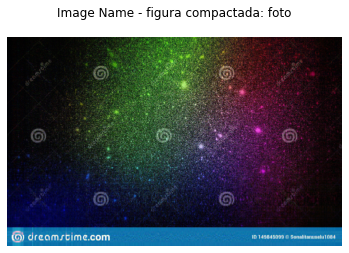

(996, 1600, 3)

20% do valor singular: 199
processing...
compressing...
dimensões do canal r: (996, 1600)
arranging...


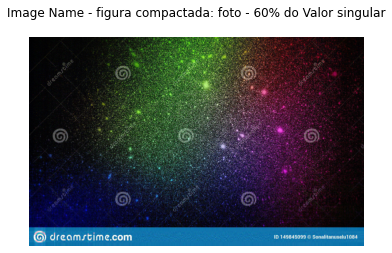


60% do valor singular: 598
processing...
compressing...
dimensões do canal r: (996, 1600)
arranging...


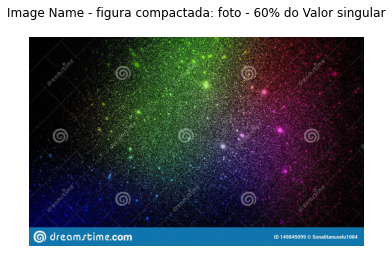


70% do valor singular: 697
processing...
compressing...
dimensões do canal r: (996, 1600)
arranging...


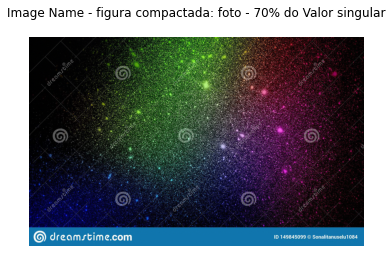


80% do valor singular: 797
processing...
compressing...
dimensões do canal r: (996, 1600)
arranging...


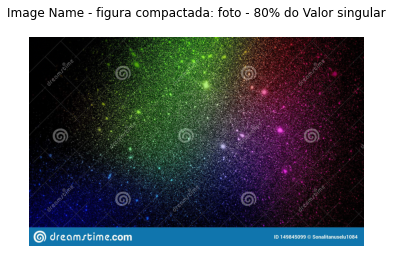

In [32]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from skimage import io
from google.colab.patches import cv2_imshow

origem = "https://thumbs.dreamstime.com/z/o-rgb-verde-e-azul-vermelho-protegido-brilha-fundo-textured-wallpaper-p-gina-do-livro-pinturas-impress-fundos-m-veis-tampas-poupan-149845099.jpg"
image = io.imread(origem) 
img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

print("\n\nImagem RGB\n")
cv2_imshow(image)

print("\n\nImagem em Tons de Cinza\n")
cv2_imshow(img)

print("\n\nImagem Comprimida\n")
k = 100
compress_image("foto", image, k)

### Manter apenas os valores que representam: 60%, 70% e 80% dos Valores Singulares.
print(image.shape)

### 20% do valor singular
k = round(0.20 * 996)
print(f'\n20% do valor singular: {k}')
compress_image("foto - 20% do Valor singular", image, k)

### 60% do Valor singular 
k = round(0.60 * 996)
print(f'\n60% do valor singular: {k}')
compress_image("foto - 60% do Valor singular", image, k)

### 70% do Valor singular
k = round(0.70 * 996)
print(f'\n70% do valor singular: {k}')
compress_image("foto - 70% do Valor singular", image, k) 

### 80% do Valor singular 
k = round(0.80 * 996)
print(f'\n80% do valor singular: {k}')
compress_image("foto - 80% do Valor singular", image, k)
